In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
raw=pd.read_csv('all_merge.csv')
raw=raw.iloc[:,1:]

In [3]:
raw.replace([np.inf, -np.inf], 0, inplace=True)

In [4]:
print(raw.columns)

Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'user_id', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'desired_amount', 'purpose', 'existing_loan_cnt',
       'existing_loan_amt', 'personal_rehabilitation', 'working', 'rate_old',
       'rate_new', 'DTI', 'date_cd', 'CompleteIDCertification', 'EndLoanApply',
       'GetCreditInfo', 'Login', 'OpenApp', 'SignUp', 'StartLoanApply',
       'UseDSRCalc', 'UseLoanManage', 'UsePrepayCalc', 'ViewLoanApplyIntro',
       'danger_score'],
      dtype='object')


In [5]:
col = ['danger_score','bank_id','loan_limit','loan_rate','desired_amount','purpose','is_applied']
raw_col = raw[col]

In [6]:
raw_col = raw[col]

raw_col['Diff'] = np.abs(raw_col['desired_amount'] + 1 - raw_col['loan_limit'])
raw_col['Diff_Rate'] = np.abs(raw_col['desired_amount'] + 1 - raw_col['loan_limit'])/(raw_col['desired_amount'] + 1)

raw_col['dd'] = raw_col['desired_amount'] - raw_col['loan_limit']

raw_col.loc[raw_col['dd'] <= 0, 'Diff'] = 0
raw_col.loc[raw_col['dd'] <= 0, 'Diff_Rate'] = 0

del raw_col['dd']

raw_col.head()

,danger_score,bank_id,loan_limit,loan_rate,desired_amount,purpose,is_applied,Diff,Diff_Rate
0,92.976939,13,20000000.0,19.1,1000000.0,생활비,0.0,0.0,0.0
1,71.488470,19,16000000.0,15.0,3000000.0,생활비,0.0,0.0,0.0
2,79.874214,13,22000000.0,16.6,3000000.0,생활비,0.0,0.0,0.0
3,50.000000,21,3000000.0,10.9,3000000.0,생활비,1.0,0.0,0.0
4,70.964361,1,3000000.0,14.9,3000000.0,생활비,0.0,0.0,0.0


In [7]:
raw['Diff'] = raw_col['Diff']

In [8]:
raw['Loan_Apply'] = raw['ViewLoanApplyIntro']+raw['StartLoanApply']+raw['CompleteIDCertification']+raw['EndLoanApply']

In [9]:
del raw['loanapply_insert_time']
del raw['insert_time']
del raw['date_cd']
del raw['Login']
del raw['OpenApp']
del raw['loan_limit']
del raw['SignUp']
del raw['product_id']
del raw['rate_old']
del raw['rate_new']
del raw['ViewLoanApplyIntro']
del raw['StartLoanApply']
del raw['CompleteIDCertification']
del raw['EndLoanApply']

In [10]:
trn=raw[raw['is_applied'].notnull()]

applied = trn[trn['is_applied']==1]
notapplied = trn[trn['is_applied']==0]

In [11]:
del applied['is_applied']
del notapplied['is_applied']

대출한 사람에게는 finda의 다른 서비스를 추천

In [12]:
applied

,application_id,bank_id,loan_rate,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,...,personal_rehabilitation,working,DTI,GetCreditInfo,UseDSRCalc,UseLoanManage,UsePrepayCalc,danger_score,Diff,Loan_Apply
3,180433,21,10.9,623737,740.0,12000000.0,FREELANCER,일용직,기타가족소유,3000000.0,...,2.0,0.0,0.273075,1.0,0.0,3.0,0.0,50.000000,0.0,3.0
10,1657888,21,10.9,752985,580.0,12000000.0,FREELANCER,기타,기타가족소유,3000000.0,...,2.0,1.0,0.699325,1.0,0.0,0.0,0.0,50.000000,0.0,0.0
14,1875716,21,12.9,644882,610.0,35000000.0,FREELANCER,기타,전월세,30000000.0,...,2.0,0.0,0.225471,4.0,0.0,2.0,0.0,60.482180,27000001.0,15.0
26,229151,30,18.3,671631,550.0,15000000.0,EARNEDINCOME2,정규직,전월세,10000000.0,...,2.0,0.0,0.686867,1.0,0.0,0.0,0.0,88.784067,2000001.0,16.0
27,229151,38,7.2,671631,550.0,15000000.0,EARNEDINCOME2,정규직,전월세,10000000.0,...,2.0,0.0,0.686867,1.0,0.0,0.0,0.0,30.607966,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460204,508044,35,15.6,478278,610.0,25000000.0,EARNEDINCOME,정규직,기타가족소유,3000000.0,...,2.0,1.0,0.356848,2.0,0.0,1.0,0.0,73.794549,0.0,4.0
9460266,1921911,4,5.7,349454,690.0,26000000.0,EARNEDINCOME,정규직,전월세,23000000.0,...,2.0,5.0,0.417492,2.0,0.0,1.0,0.0,21.907757,2000001.0,3.0
9460287,475256,4,13.4,352539,590.0,50000000.0,EARNEDINCOME,정규직,전월세,1000000.0,...,2.0,4.0,0.178136,0.0,0.0,0.0,0.0,62.264151,0.0,4.0
9460356,1015795,9,5.4,567606,740.0,40000000.0,EARNEDINCOME,정규직,자가,20000000.0,...,2.0,0.0,0.208525,0.0,0.0,0.0,0.0,20.335430,17000001.0,4.0


신청 안한 사람에게는 대출을 할 수 있게 다른 조건들 추천

In [13]:
notapplied

,application_id,bank_id,loan_rate,user_id,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,...,personal_rehabilitation,working,DTI,GetCreditInfo,UseDSRCalc,UseLoanManage,UsePrepayCalc,danger_score,Diff,Loan_Apply
0,566528,13,19.1,681184,580.0,8000000.0,OTHERINCOME,기타,전월세,1000000.0,...,2.0,1.0,0.611225,2.0,0.0,10.0,0.0,92.976939,0.0,8.0
1,180433,19,15.0,623737,740.0,12000000.0,FREELANCER,일용직,기타가족소유,3000000.0,...,2.0,0.0,0.273075,1.0,0.0,3.0,0.0,71.488470,0.0,3.0
2,180433,13,16.6,623737,740.0,12000000.0,FREELANCER,일용직,기타가족소유,3000000.0,...,2.0,0.0,0.273075,1.0,0.0,3.0,0.0,79.874214,0.0,3.0
4,180433,1,14.9,623737,740.0,12000000.0,FREELANCER,일용직,기타가족소유,3000000.0,...,2.0,0.0,0.273075,1.0,0.0,3.0,0.0,70.964361,0.0,3.0
5,1657888,24,15.9,752985,580.0,12000000.0,FREELANCER,기타,기타가족소유,3000000.0,...,2.0,1.0,0.699325,1.0,0.0,0.0,0.0,76.205451,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460405,455157,55,18.9,717233,610.0,106000000.0,EARNEDINCOME,정규직,자가,50000000.0,...,2.0,25.0,0.745100,5.0,0.0,3.0,0.0,91.090147,47000001.0,20.0
9460406,455157,35,18.3,717233,610.0,106000000.0,EARNEDINCOME,정규직,자가,50000000.0,...,2.0,25.0,0.745100,5.0,0.0,3.0,0.0,87.945493,47000001.0,20.0
9460407,455157,22,18.4,717233,610.0,106000000.0,EARNEDINCOME,정규직,자가,50000000.0,...,2.0,25.0,0.745100,5.0,0.0,3.0,0.0,88.469602,45000001.0,20.0
9460408,455157,38,14.5,717233,610.0,106000000.0,EARNEDINCOME,정규직,자가,50000000.0,...,2.0,25.0,0.745100,5.0,0.0,3.0,0.0,68.029350,47000001.0,20.0


---

**Q1.** 금리를 얼마나 올려야 대출한도를 높일 수 있는지?  
  
대출을 신청하지 않은 사람의 경우, 신청 대출금액(desired_amount)에 비해 대출한도(loan_limit)가 낮아서 대출을 신청하지 않았다라고 생각했다.  
따라서 대출을 신청하지 않은 집단을 대상으로 금리와 대출한도간의 Linear Regression을 통해 '금리를 얼마나 올려야 대출한도를 높일 수 있는지를' 보여주려고 한다.

In [14]:
raw['purpose'].unique()

array(['생활비', '대환대출', '사업자금', '기타', '자동차구입', '전월세보증금', '주택구입', '투자'],
      dtype=object)

In [15]:
limit = notapplied[notapplied['purpose']=='주택구입'][['loan_rate', 'Diff']]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  114130070.00569072
계수 :  [-3621342.47434691]


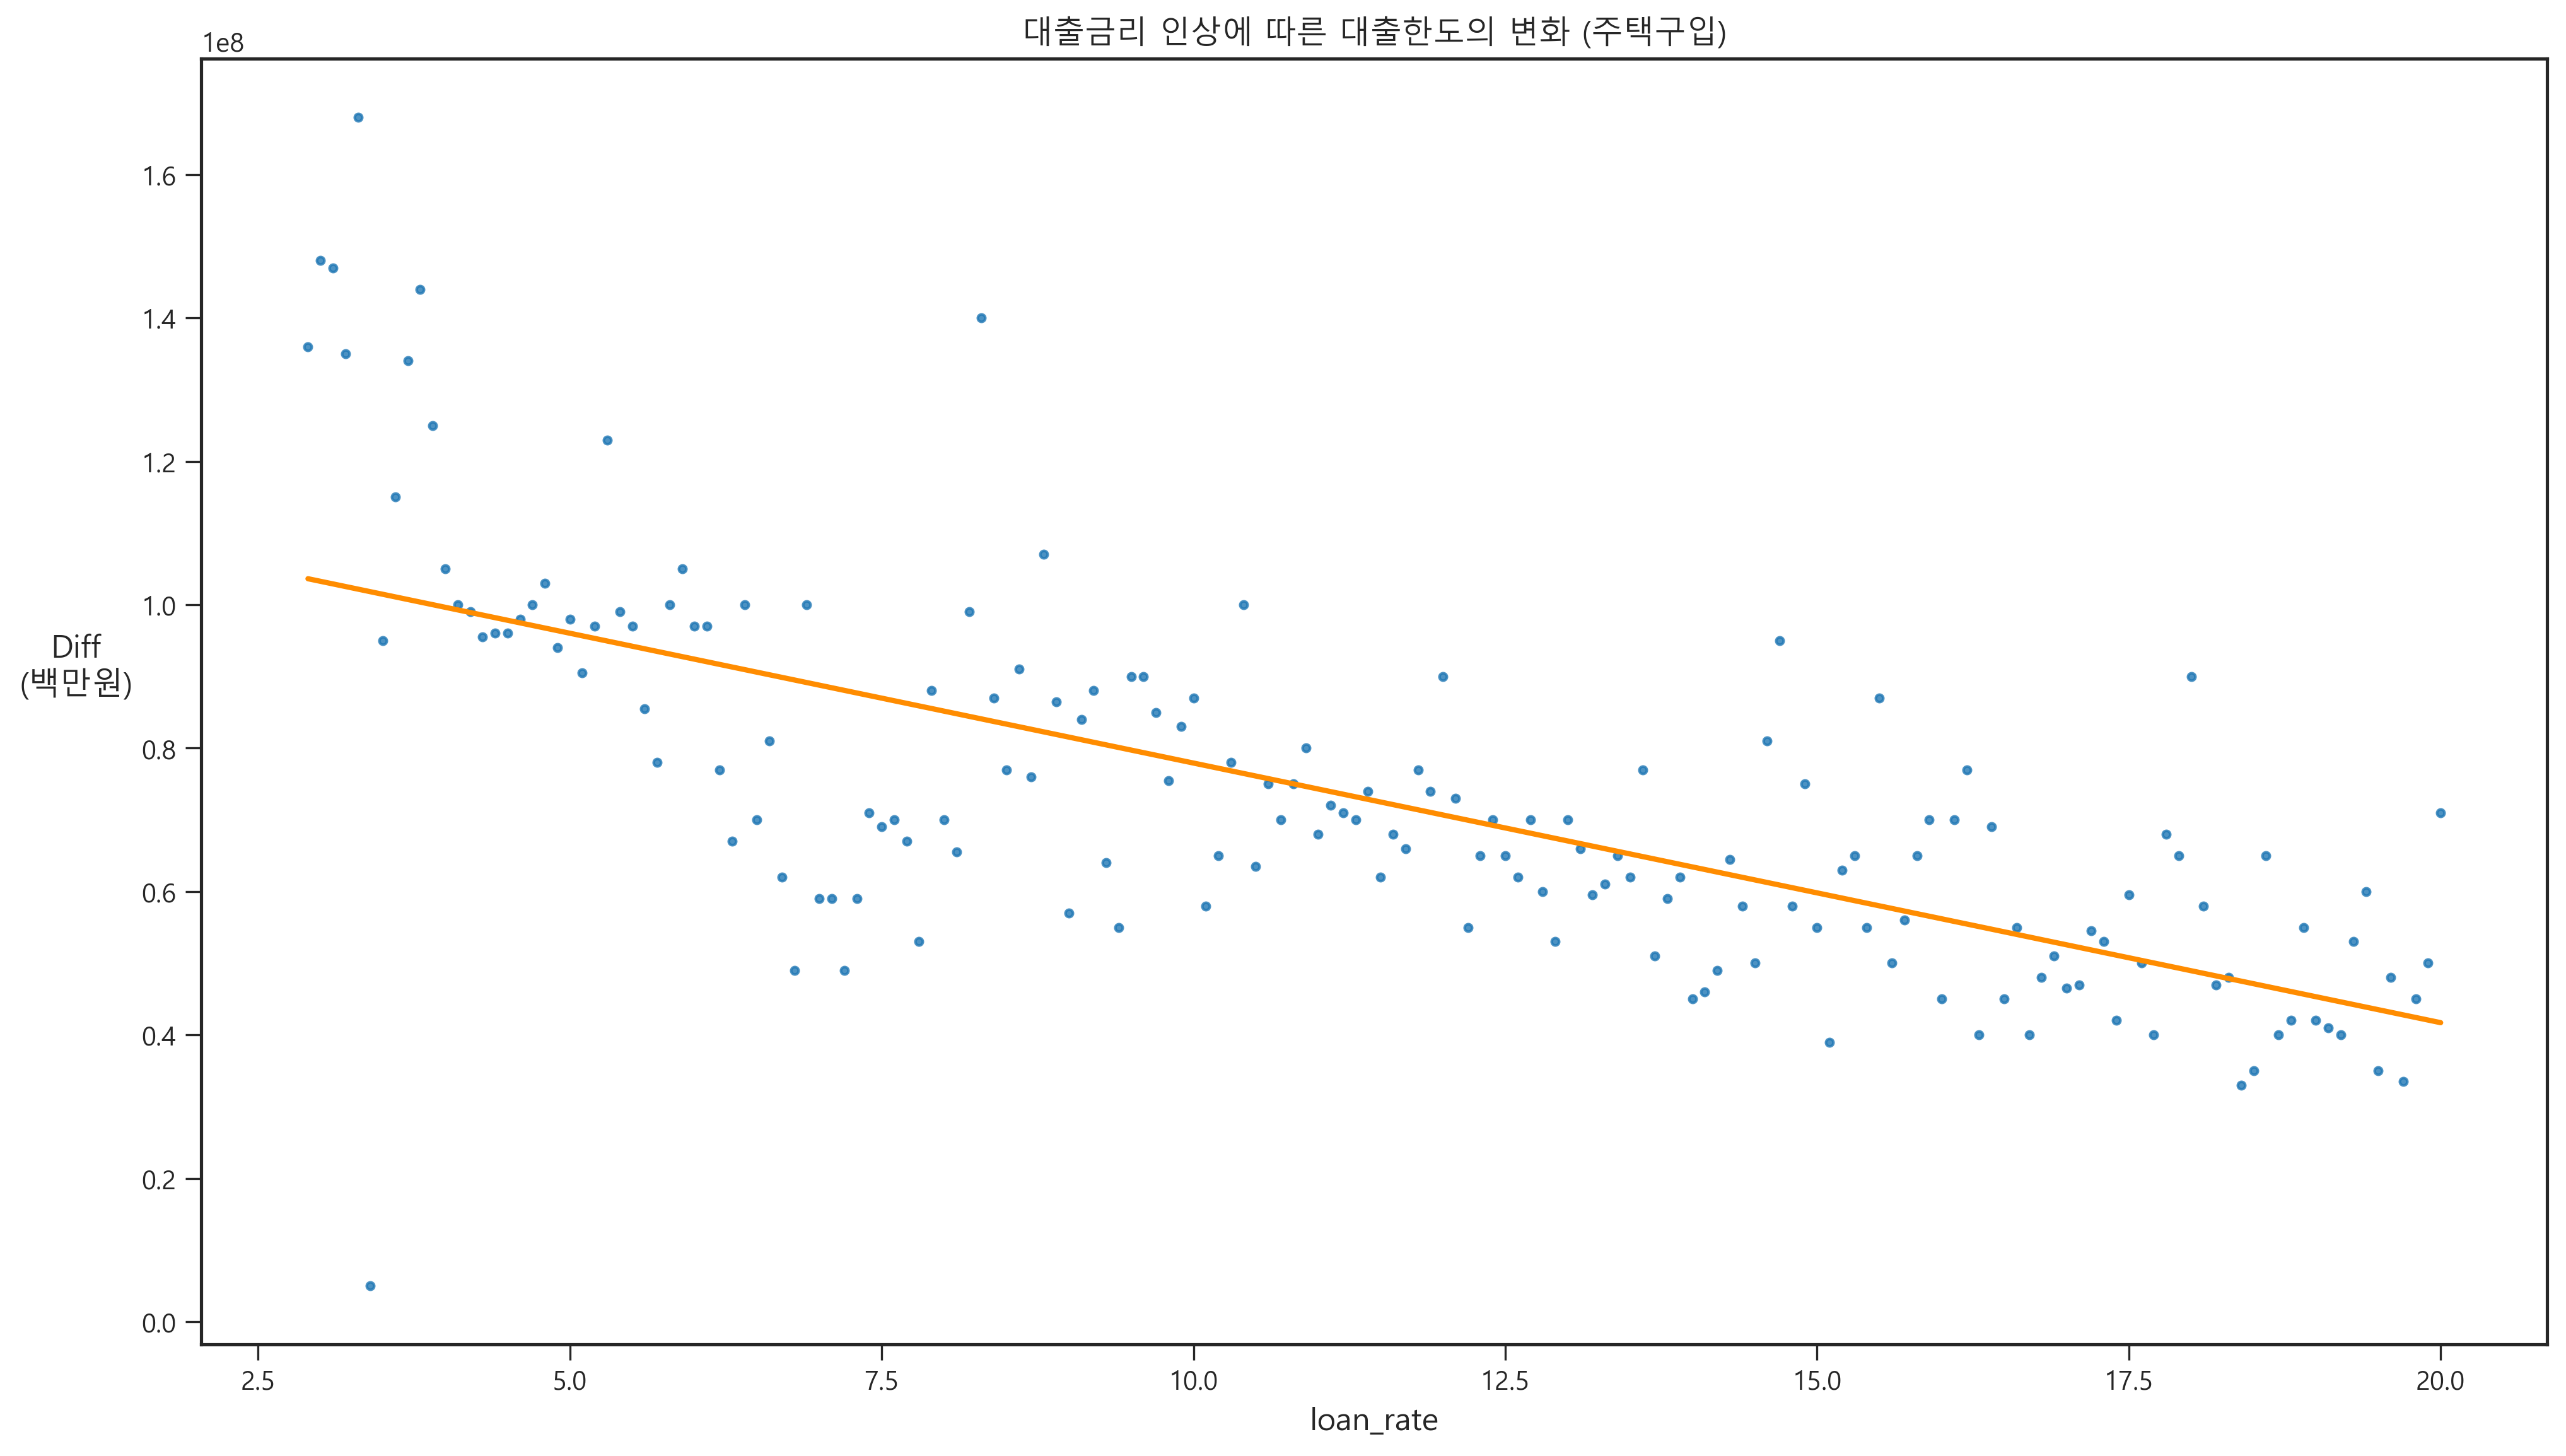

In [16]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)

plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (주택구입)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [17]:
limit = notapplied[notapplied['purpose']=='생활비'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  27440455.29139457
계수 :  [-717608.47878535]


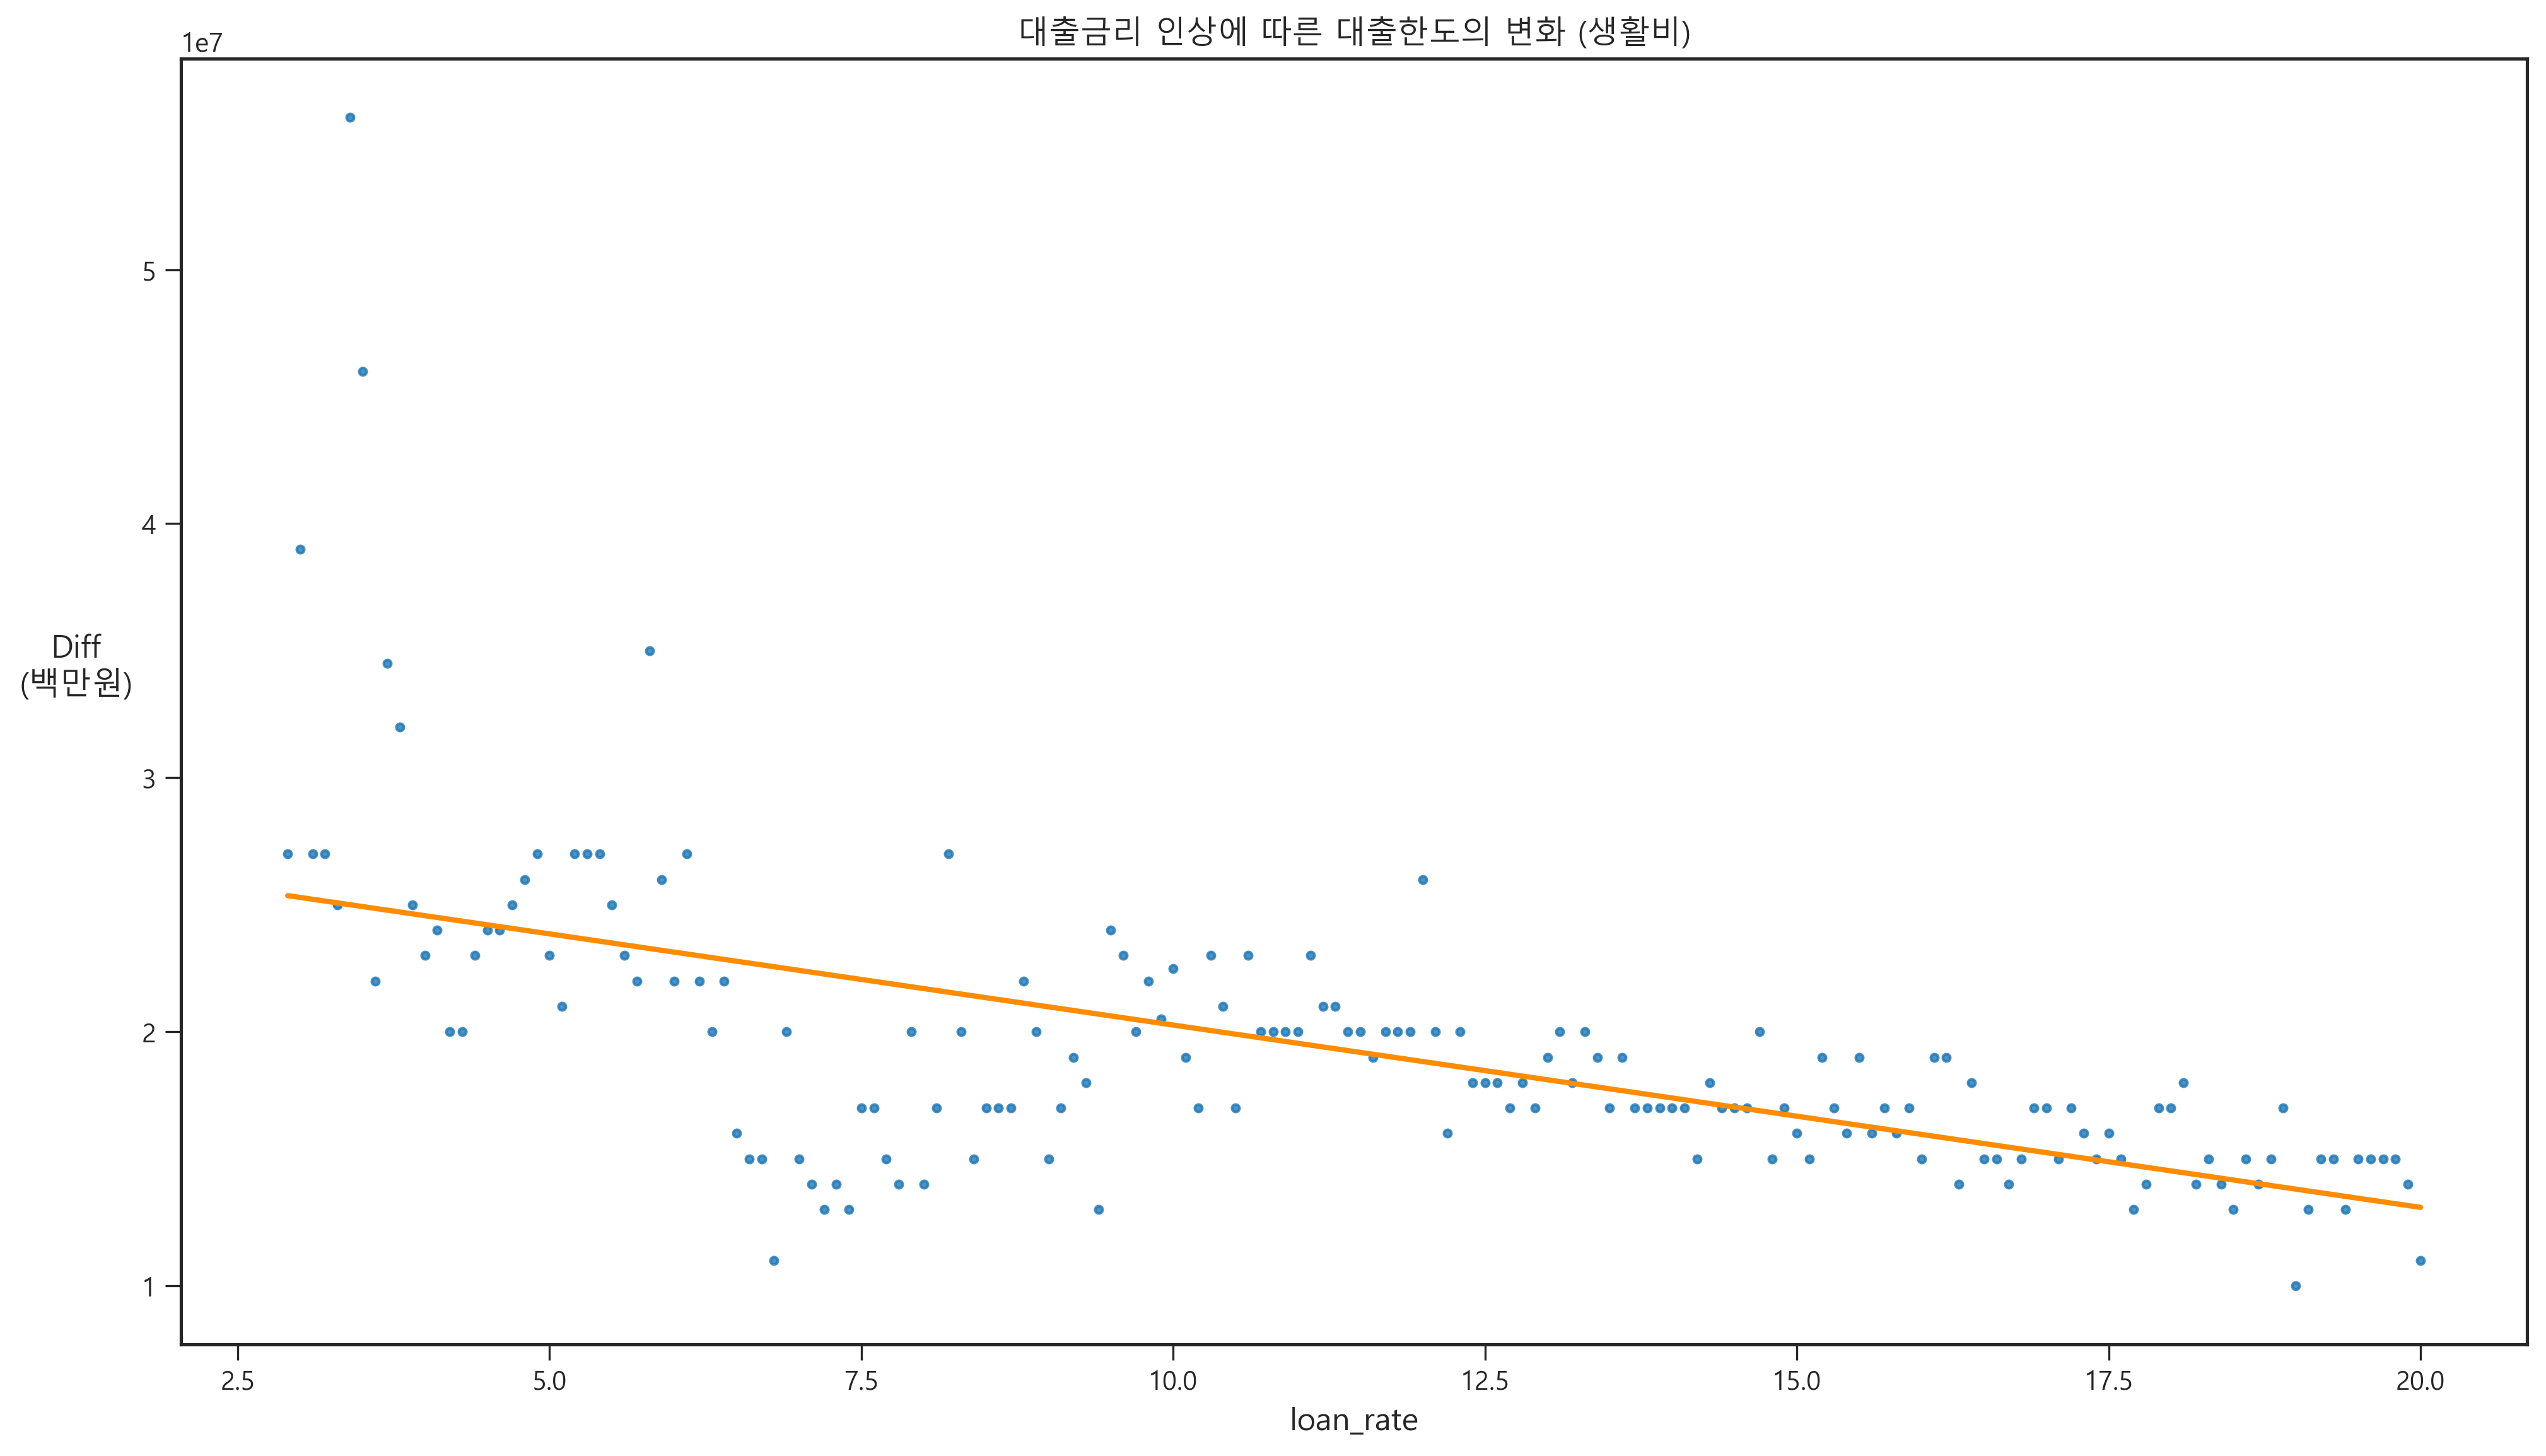

In [18]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (생활비)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [19]:
limit = notapplied[notapplied['purpose']=='대환대출'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  32357497.52731102
계수 :  [-713917.64126003]


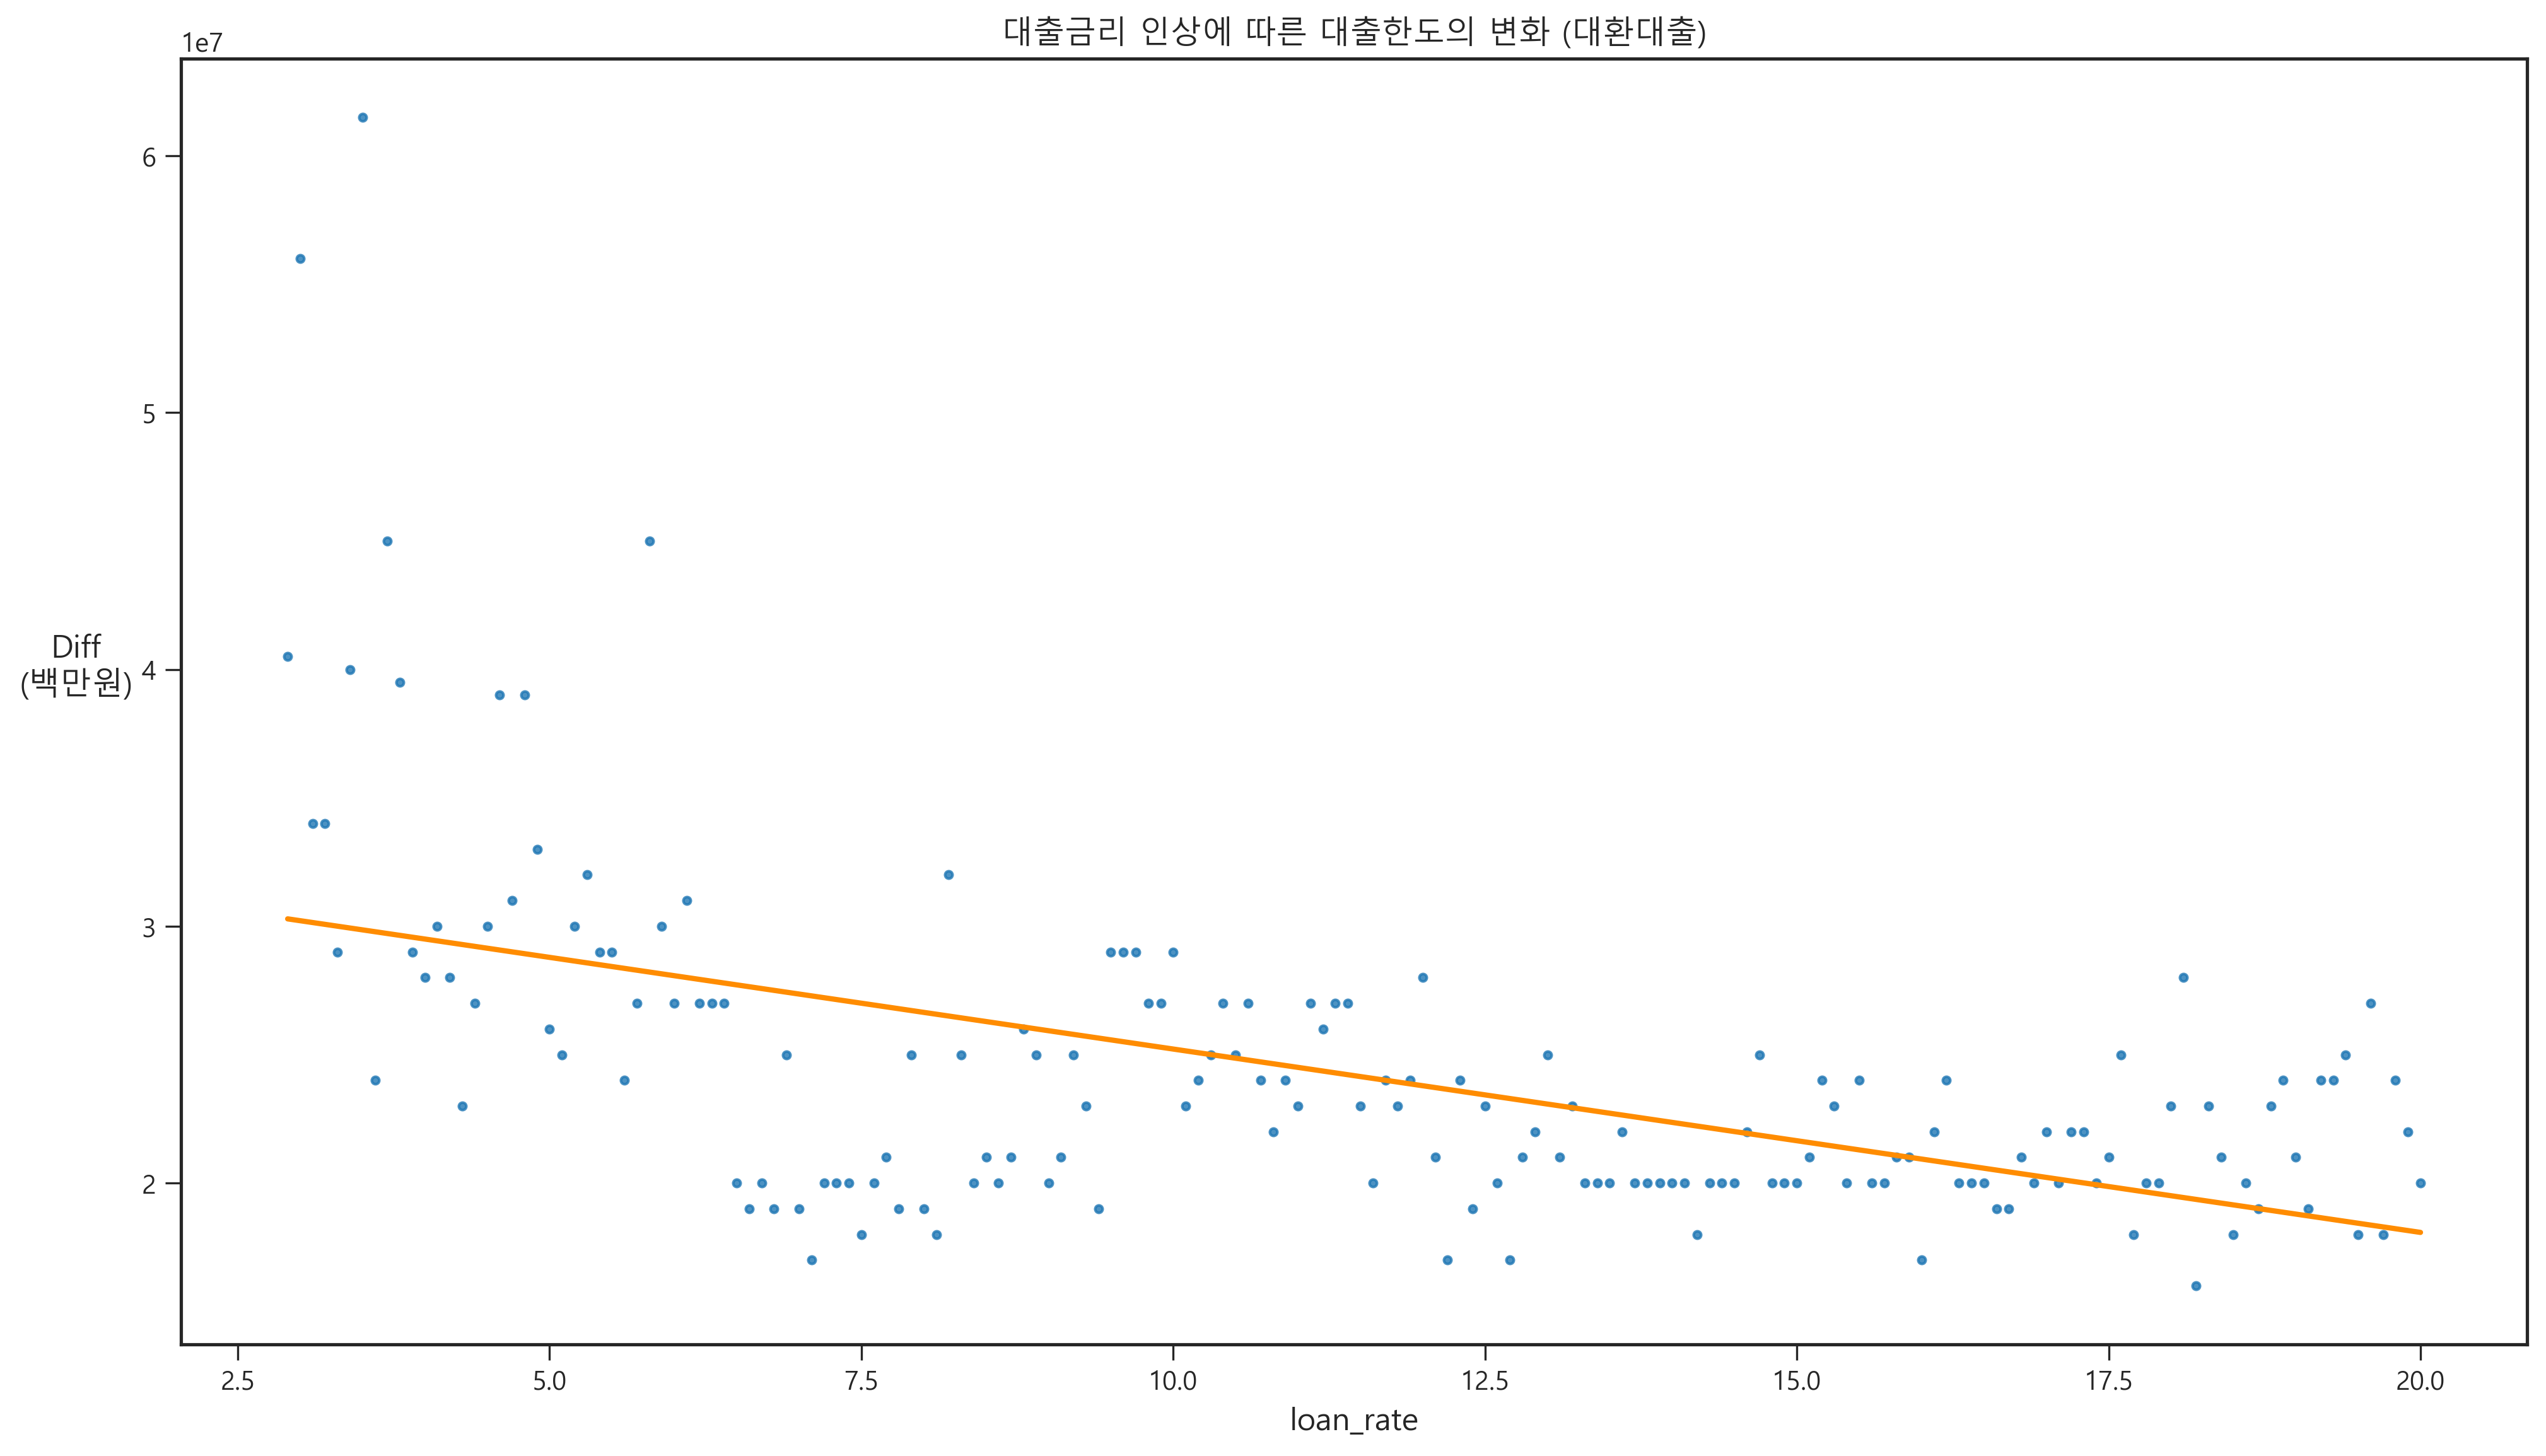

In [20]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (대환대출)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [21]:
limit = notapplied[notapplied['purpose']=='사업자금'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  45351782.32691717
계수 :  [-1116676.73121755]


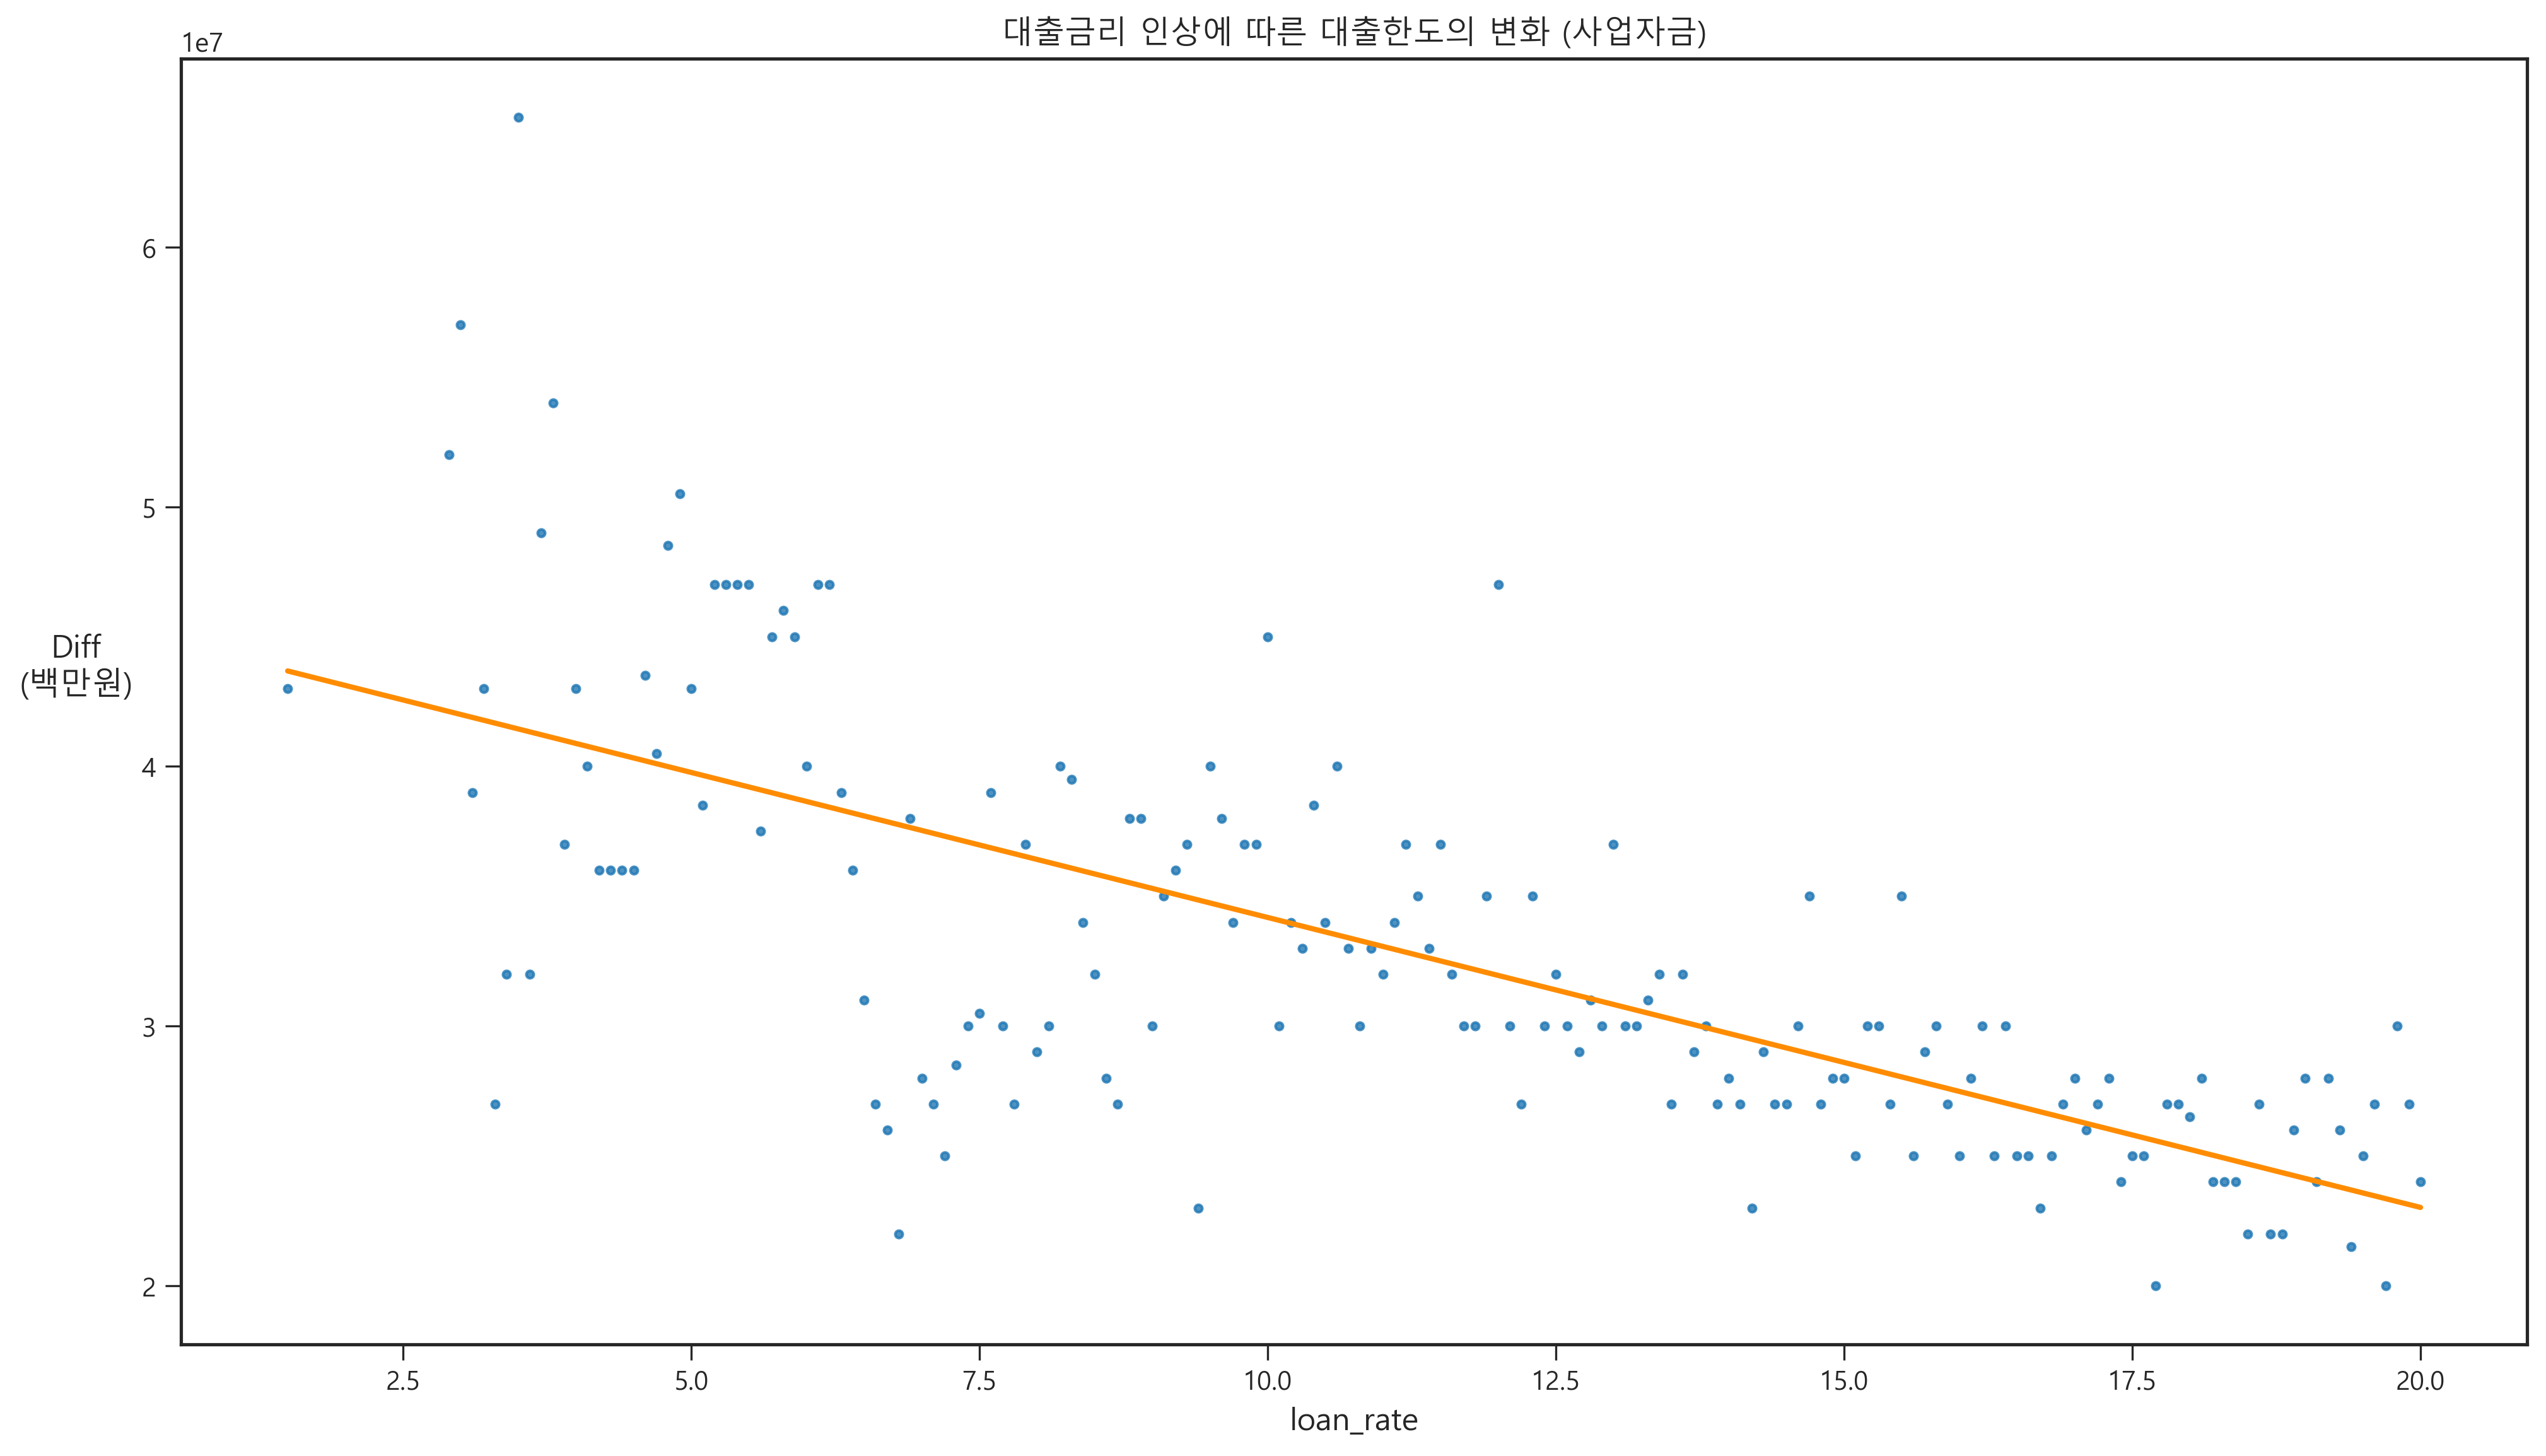

In [22]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (사업자금)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [23]:
limit = notapplied[notapplied['purpose']=='자동차구입'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  22080643.27808255
계수 :  [-434337.89803835]


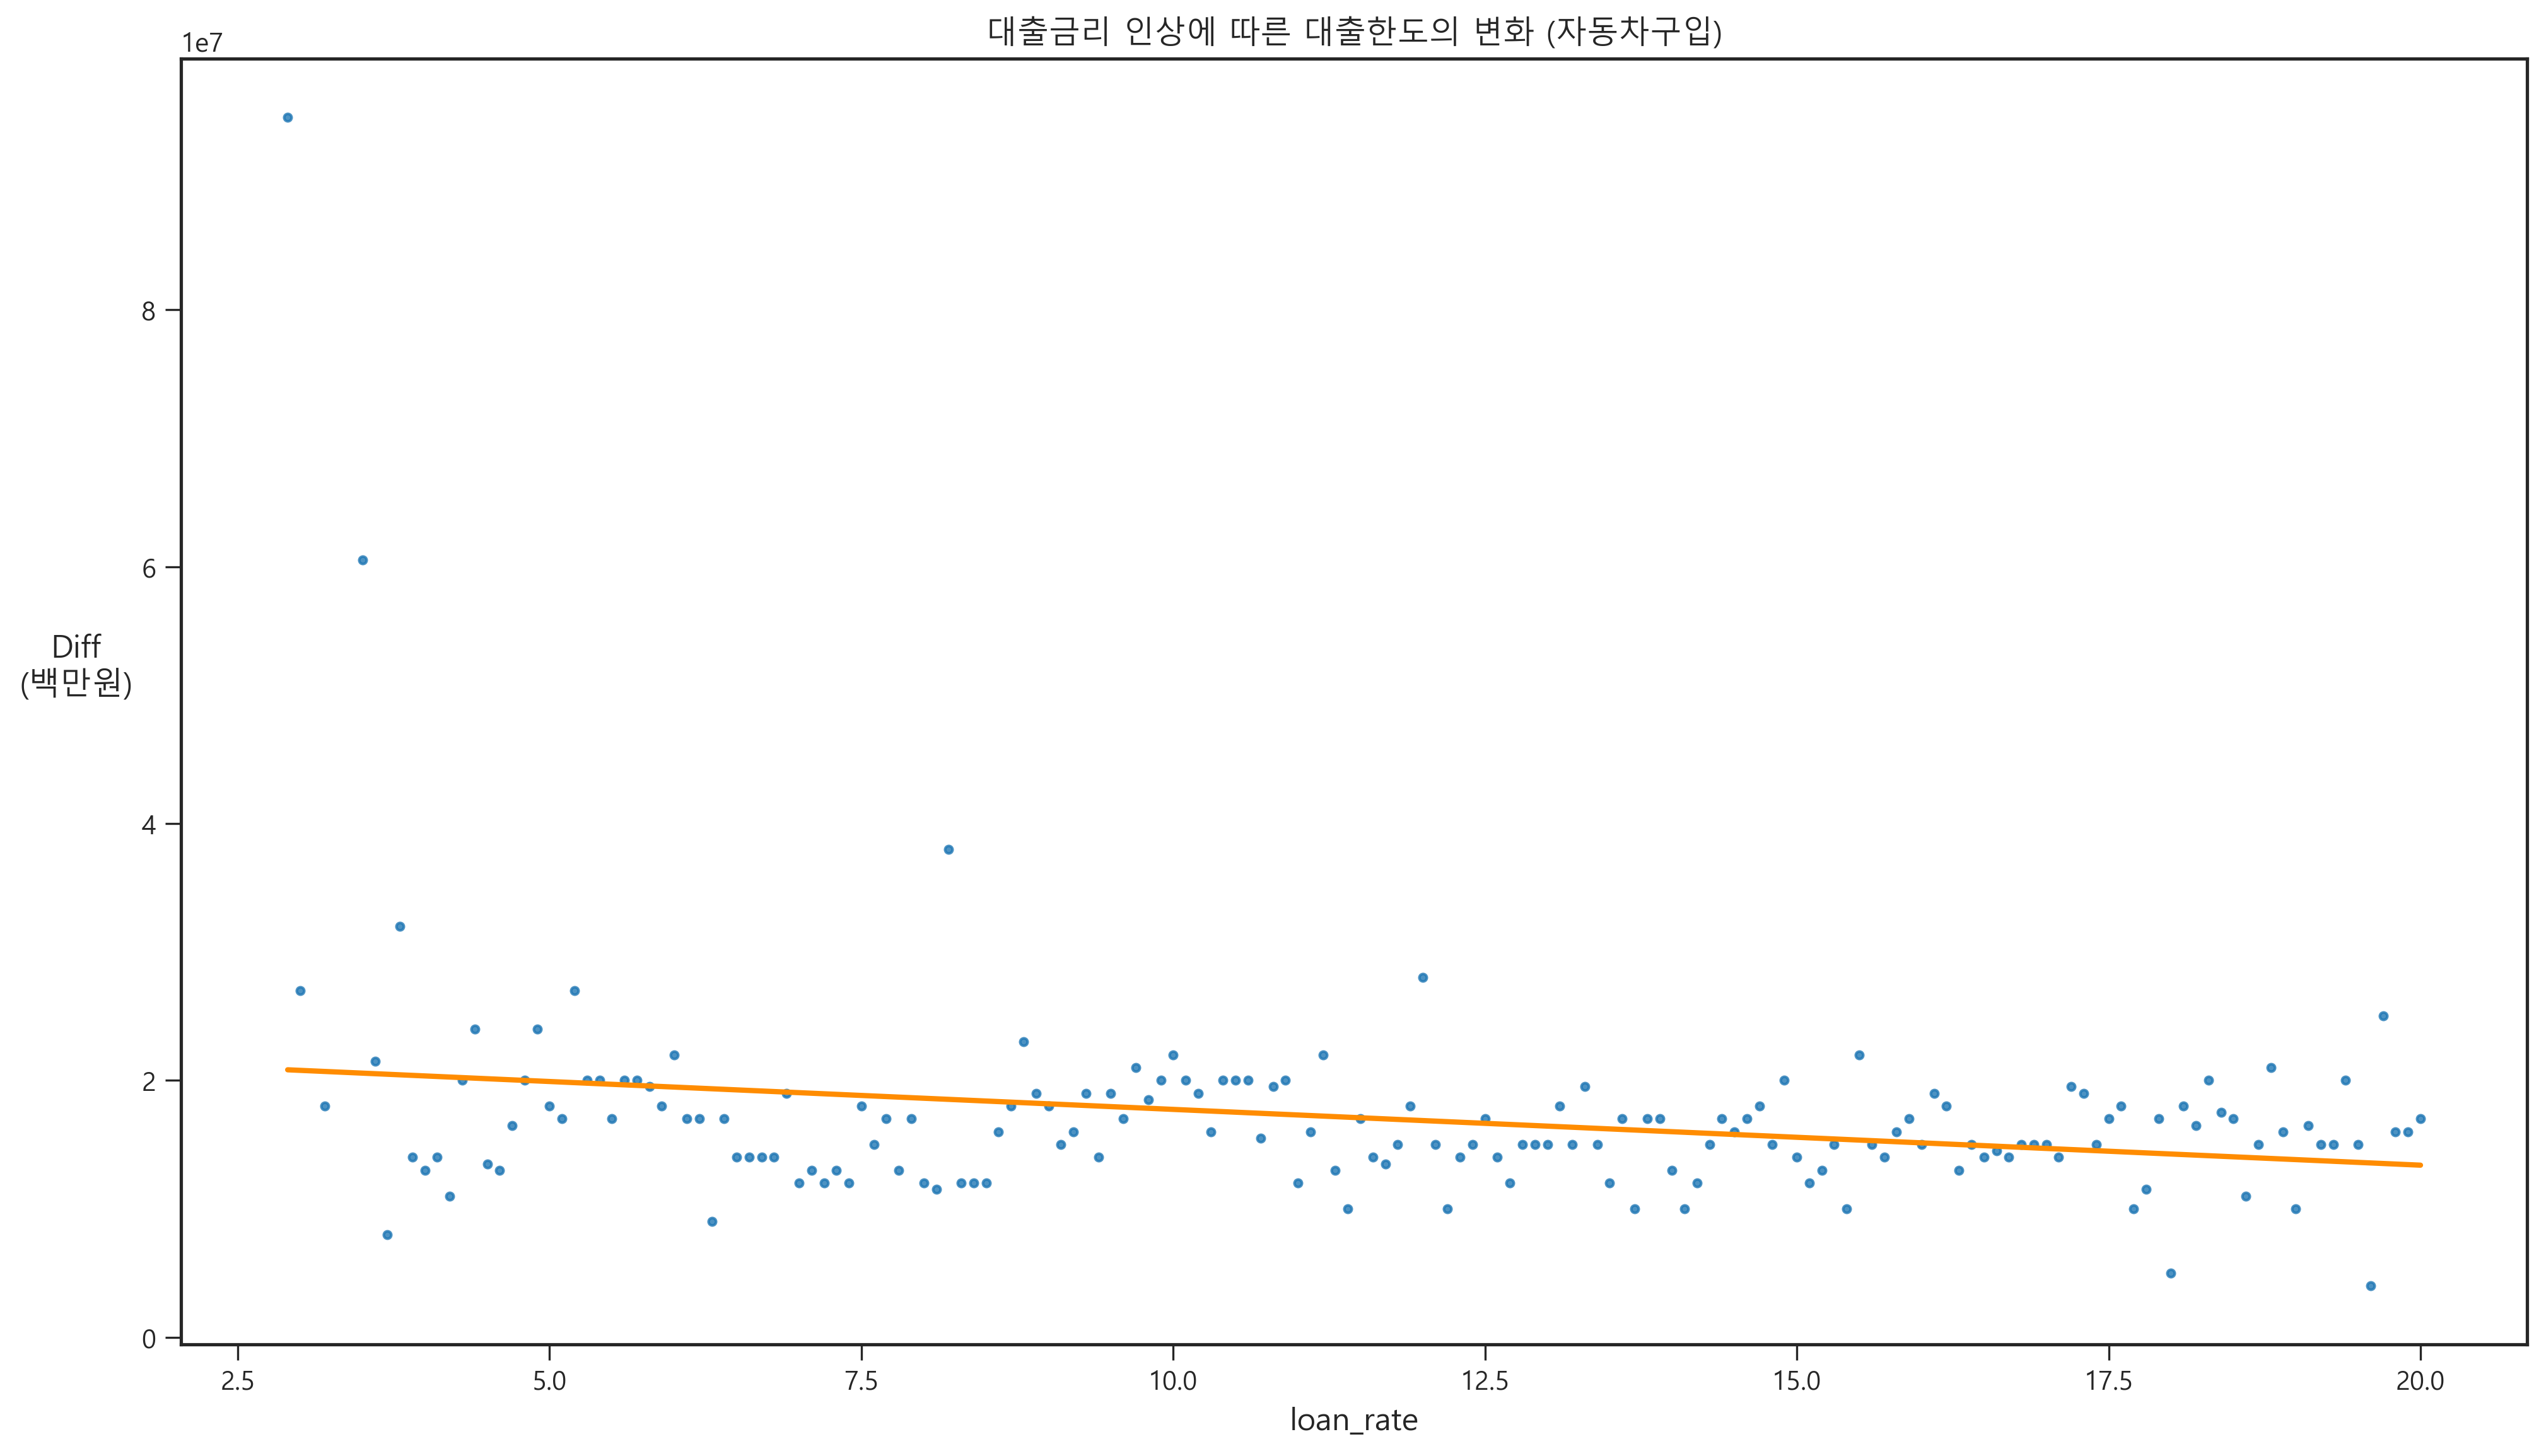

In [24]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (자동차구입)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [25]:
limit = notapplied[notapplied['purpose']=='전월세보증금'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  105539298.98619415
계수 :  [-3549435.9975756]


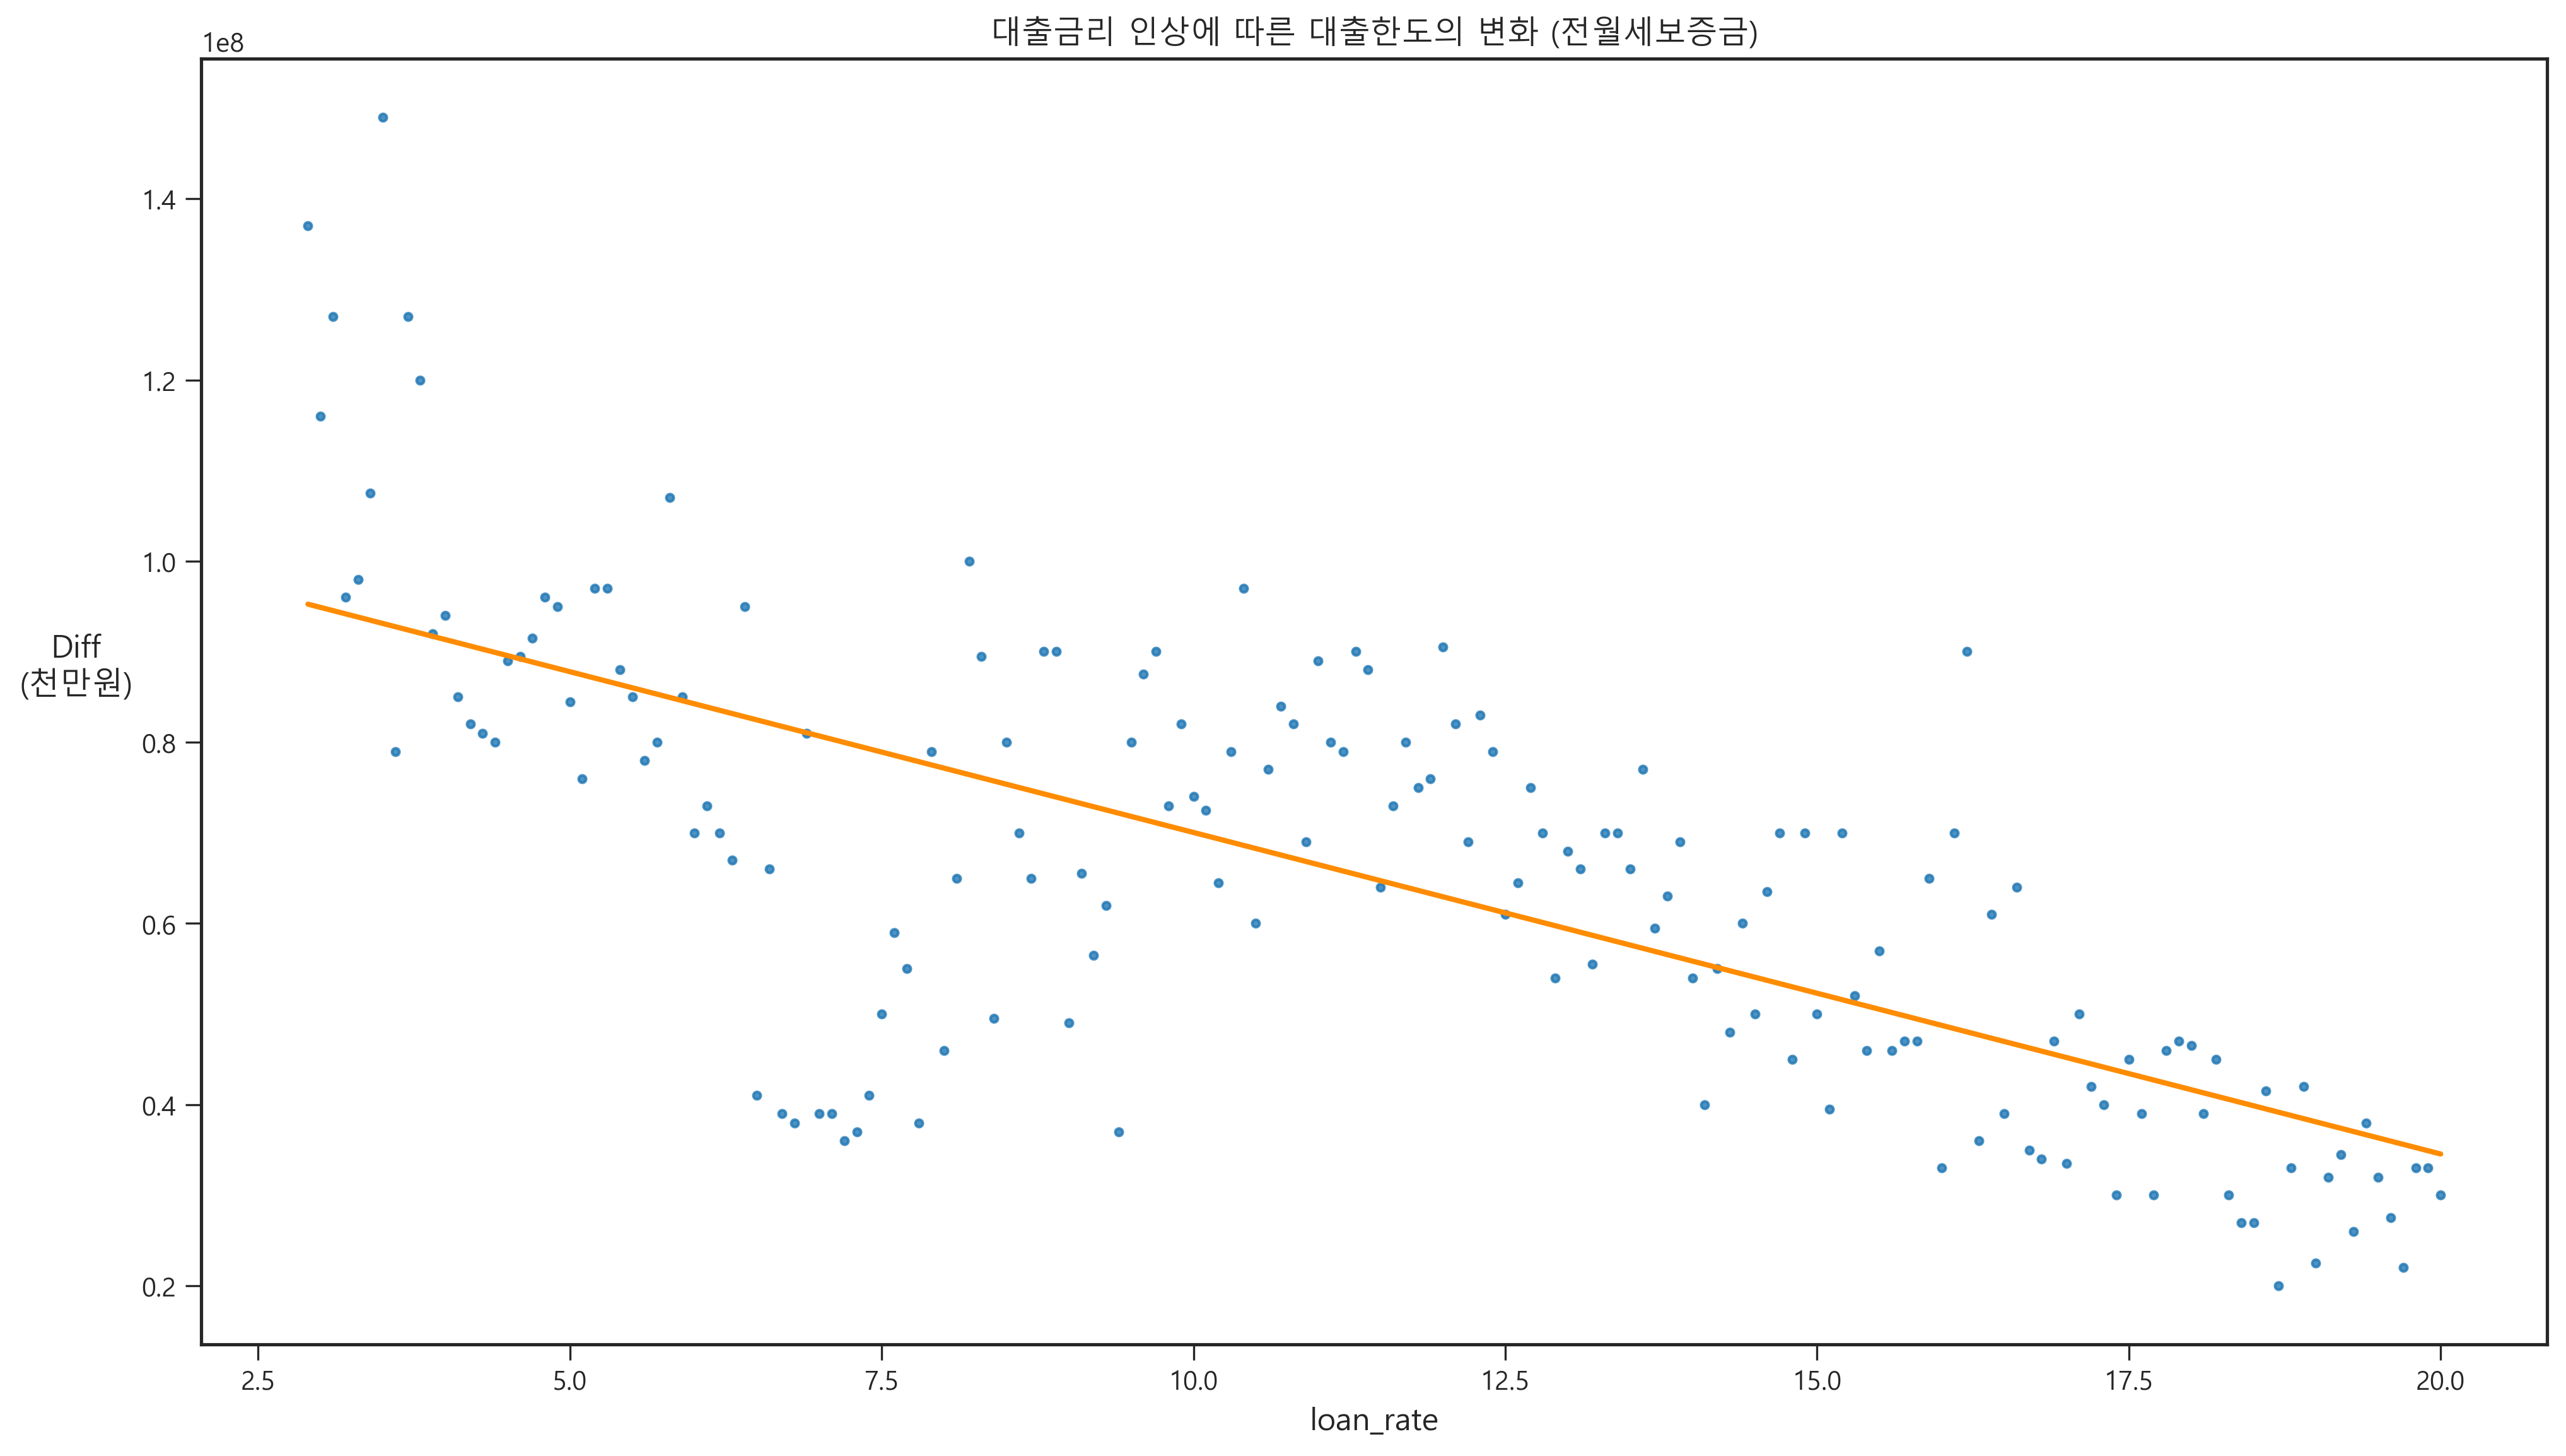

In [26]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (전월세보증금)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(천만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()

In [27]:
limit = notapplied[notapplied['purpose']=='투자'][['loan_rate', 'Diff']]
limit = limit[limit['Diff'] >0]

X = limit[['loan_rate']]
y = limit['Diff']

med = limit.groupby('loan_rate').median().reset_index()

from sklearn.linear_model import LinearRegression

X = med[['loan_rate']]
y = med['Diff']

linear = LinearRegression()
linear.fit(X,y)

print('절편 : ', linear.intercept_)
print('계수 : ', linear.coef_)

절편 :  44032424.359110236
계수 :  [-940173.05665023]


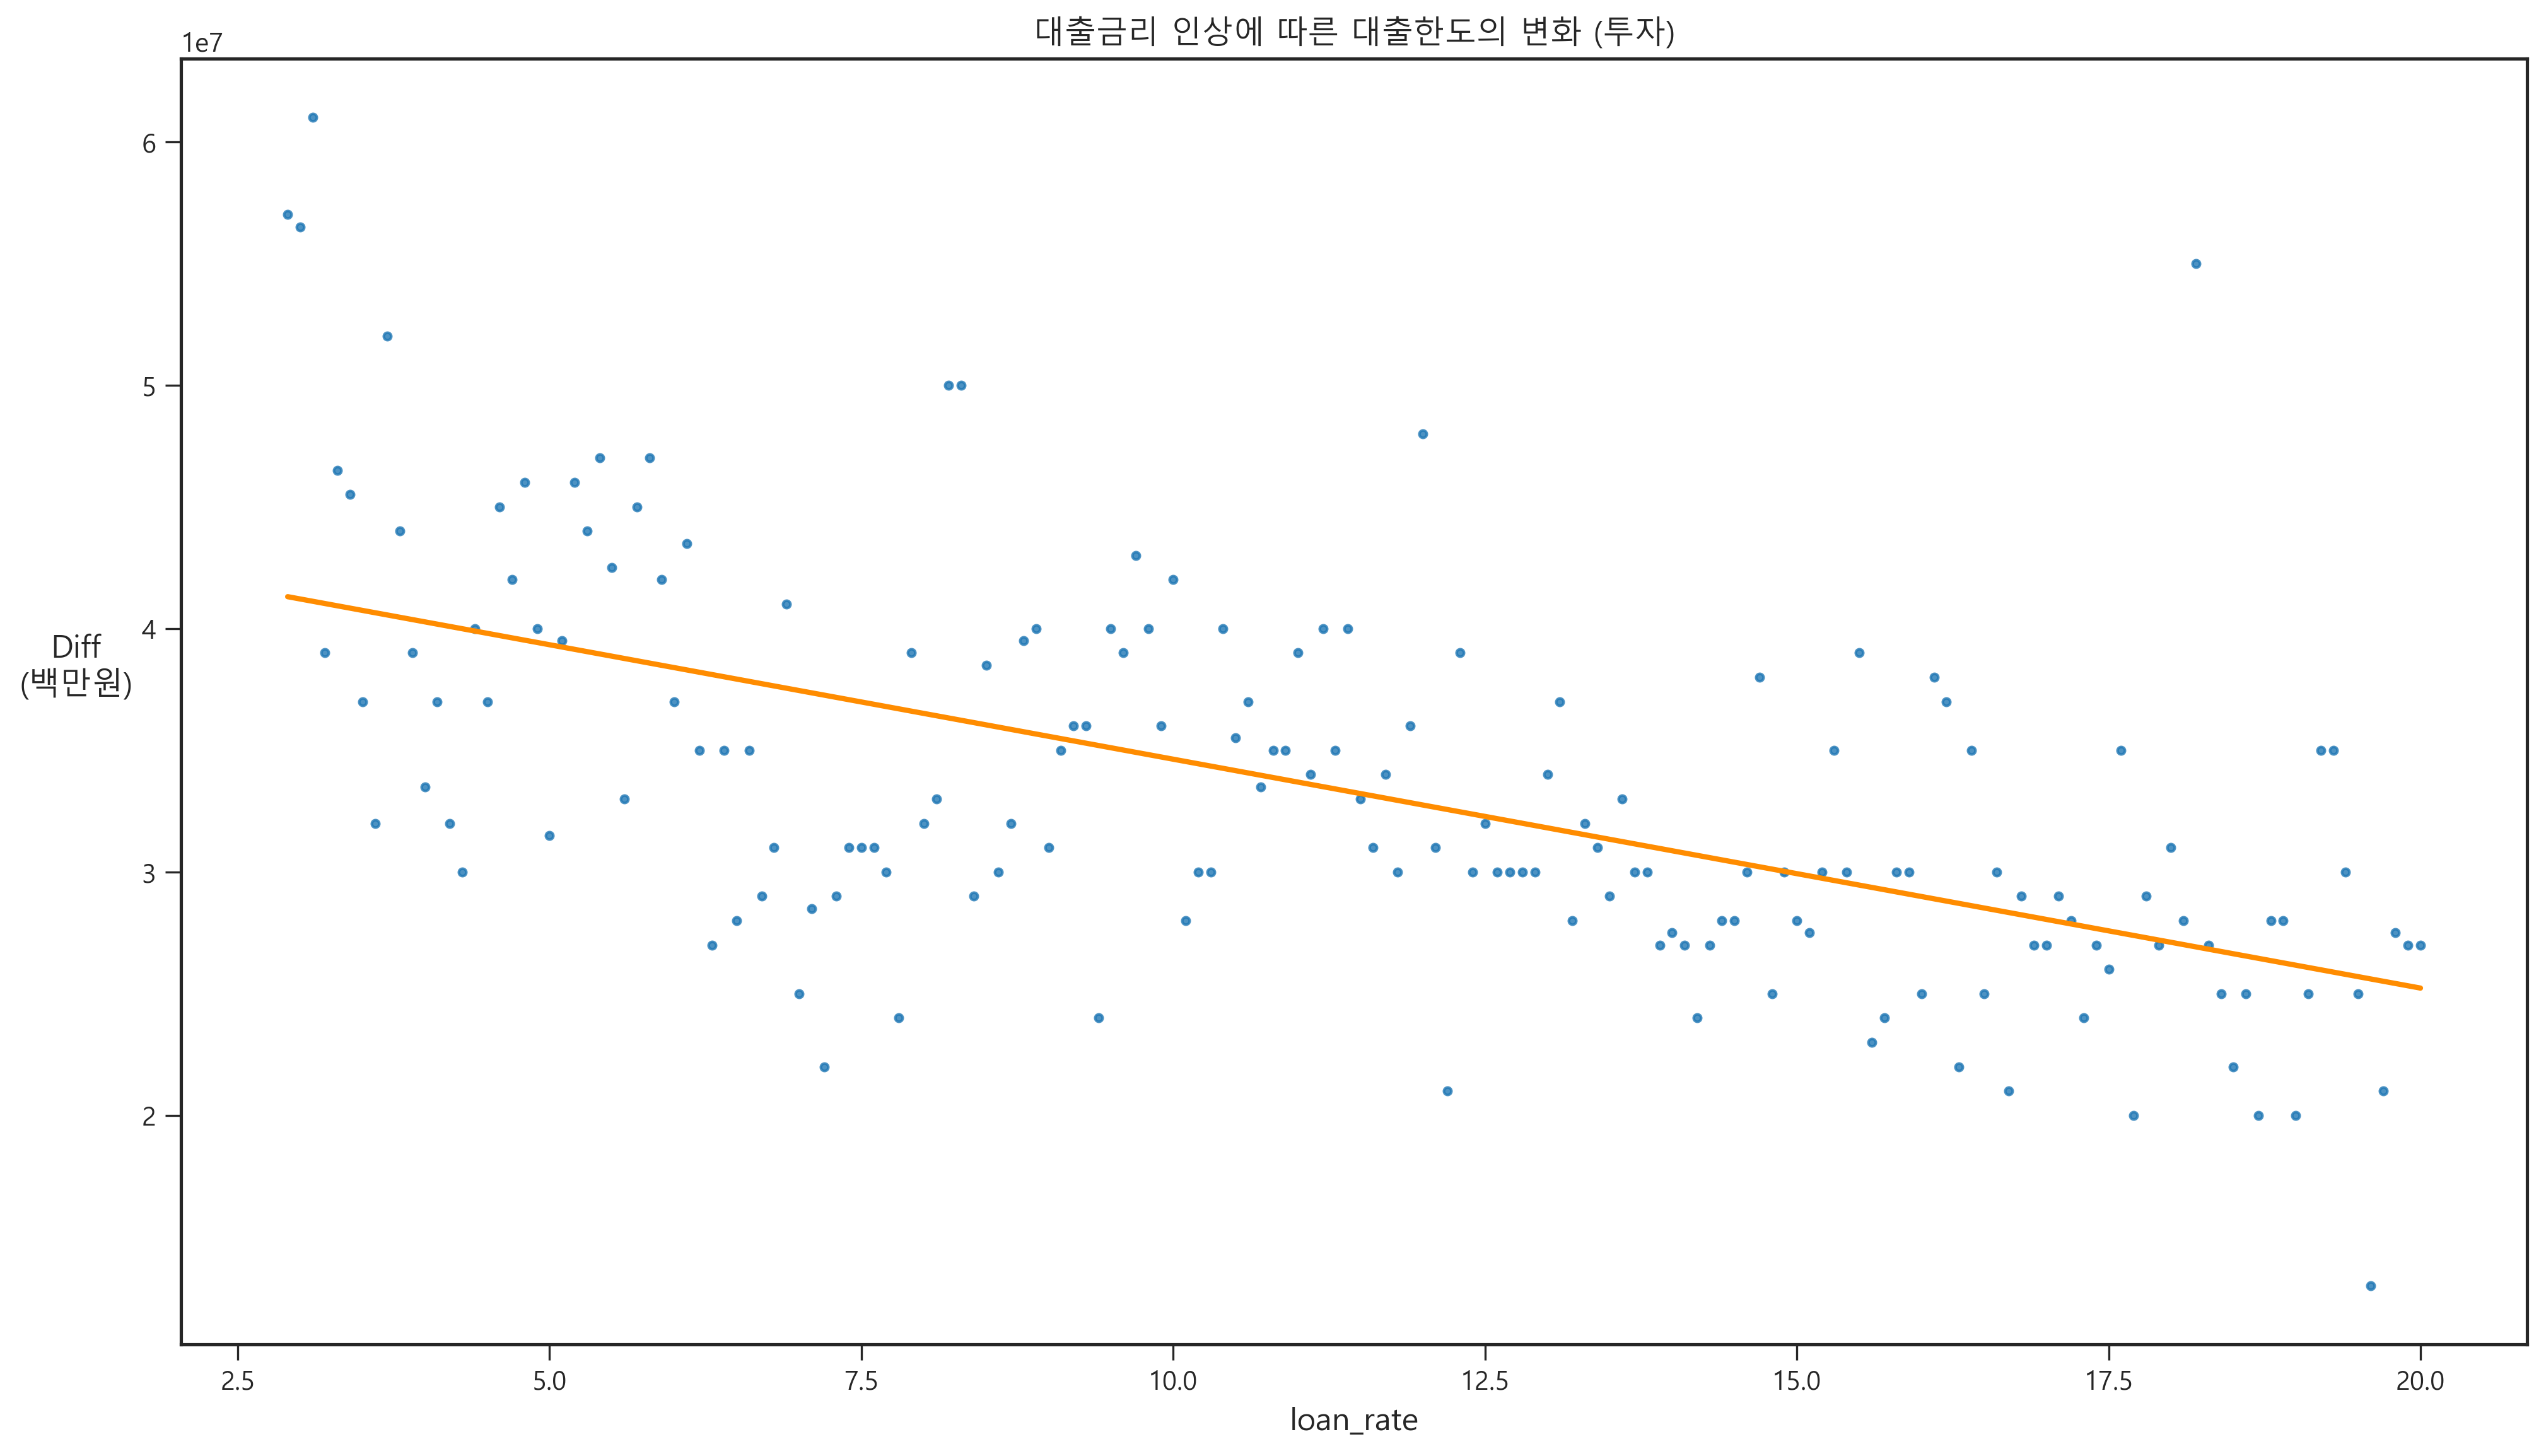

In [28]:
plt.scatter(med['loan_rate'], med['Diff'], alpha = 0.8, s = 8)
plt.plot(X.values, linear.predict(X.values), color = 'darkorange', linewidth = 2)

plt.title('대출금리 인상에 따른 대출한도의 변화 (투자)', fontsize = 12)
plt.xlabel('loan_rate', fontsize = 12)
plt.ylabel('Diff\n(백만원)', fontsize = 12, rotation = 0, labelpad = 25)

plt.show()